In [ ]:
import pandapower as pp
import pandapower.plotting as plot
import matplotlib.pyplot as plt

# Crear la red de ejemplo
net = pp.create_empty_network()

# Crear barras
bus1 = pp.create_bus(net, vn_kv=110, name="Bus 1")
bus2 = pp.create_bus(net, vn_kv=220, name="Bus 2")
bus1a = pp.create_bus(net, vn_kv=220, name="Bus 1A")
bus2a = pp.create_bus(net, vn_kv=220, name="Bus 2A")
bus3a = pp.create_bus(net, vn_kv=220, name="Bus 3A")
bus1b = pp.create_bus(net, vn_kv=220, name="Bus 1B")
bus2b = pp.create_bus(net, vn_kv=220, name="Bus 2B")

# Crear las líneas de transmisión
pp.create_line(net, from_bus=bus2, to_bus=bus1a, length_km=10, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="Linea 2-1A")
pp.create_line(net, from_bus=bus1a, to_bus=bus2a, length_km=15, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="Linea 1A-2A")
pp.create_line(net, from_bus=bus2a, to_bus=bus3a, length_km=20, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="Linea 2A-3A")
pp.create_line(net, from_bus=bus3a, to_bus=bus2b, length_km=15, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="Linea 3A-2B")
pp.create_line(net, from_bus=bus2, to_bus=bus1b, length_km=10, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="Linea 2-1B")
pp.create_line(net, from_bus=bus1b, to_bus=bus2b, length_km=30, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="Linea 1B-2B")

# Crear un transformador
pp.create_transformer(net, hv_bus=bus2, lv_bus=bus1, std_type="100 MVA 220/110 kV", name="Trafo 1-2")

# Crear una barra slack
pp.create_ext_grid(net, bus=bus1, vm_pu=1.0)

ext_grid = net.ext_grid.at[0]
net.ext_grid.at[ext_grid.name, 'max_q_mvar'] *= 1.2
net.ext_grid.at[ext_grid.name, 'min_q_mvar'] *= 1.2

# Definir la carga nominal para todas las barras
p_nominal = 150  # MW
q_nominal = 100  # MVAr

# Cargas para cada barra 
pp.create_load(net, bus=bus1a, p_mw=p_nominal*0.2, q_mvar=q_nominal*0.2, name="Load 1A")
pp.create_load(net, bus=bus2a, p_mw=p_nominal*0.35, q_mvar=q_nominal*0.35, name="Load 2A")
pp.create_load(net, bus=bus3a, p_mw=p_nominal*0.15, q_mvar=q_nominal*0.15, name="Load 3A")
pp.create_load(net, bus=bus1b, p_mw=p_nominal*0.1, q_mvar=q_nominal*0.1, name="Load 1B")
pp.create_load(net, bus=bus2b, p_mw=p_nominal*0.6, q_mvar=q_nominal*0.6, name="Load 2B")



# Ejecutar el flujo de carga
pp.runpp(net)

# Obtener resultados
bus_voltage = net.res_bus.vm_pu
line_loading = net.res_line.loading_percent

# Graficar los resultados
plt.figure(figsize=(14, 7))

# Gráfico de tensiones en las barras
plt.subplot(2, 1, 1)
plt.bar(net.bus.index, bus_voltage, color='green')
plt.xlabel('Barras')
plt.ylabel('Tensión (pu)')
plt.title('Tensión en las Barras con 20% más de reactivos')
plt.grid(True)

# Gráfico de carga de líneas
plt.subplot(2, 1, 2)
plt.bar(net.line.index, line_loading, color='green')
plt.xlabel('Líneas')
plt.ylabel('Carga (%)')
plt.title('Carga de las Líneas con 20% más de reactivos')
plt.grid(True)

plt.tight_layout()
plt.show()
print(bus_voltage)
print(line_loading)

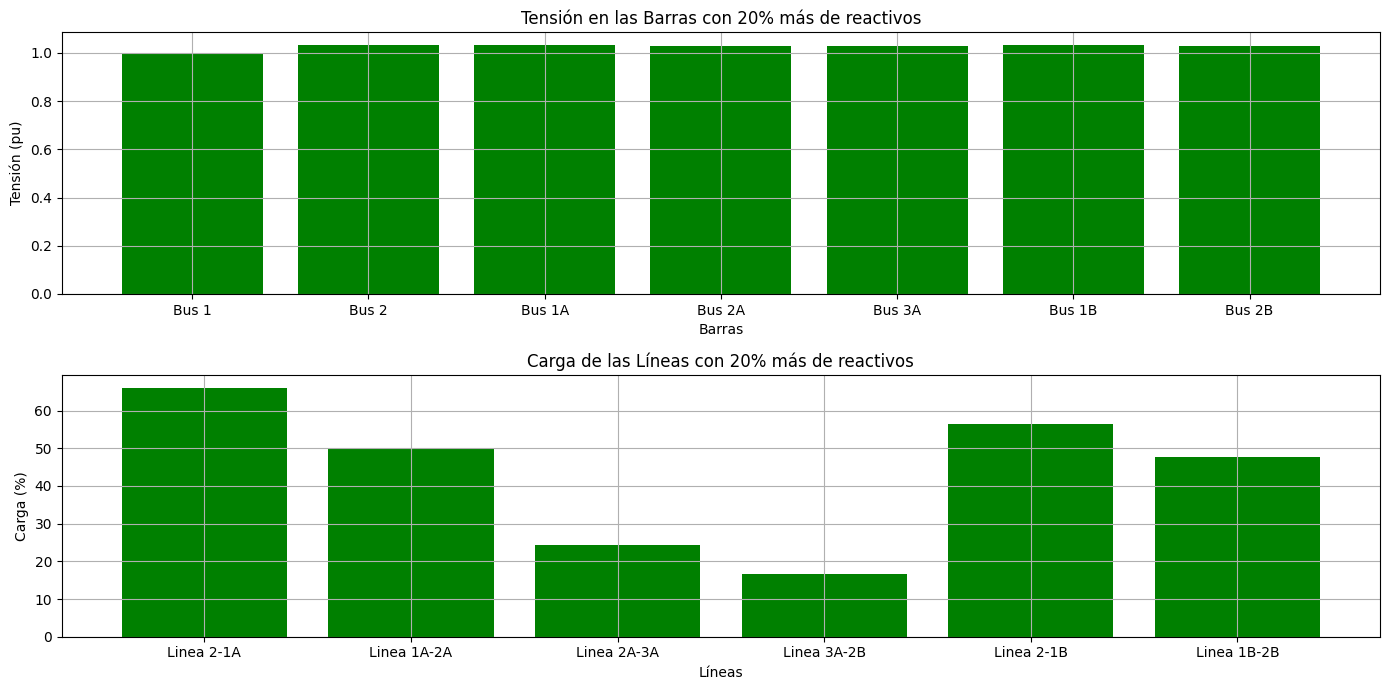

Tensiones en las barras (pu):
0    1.000000
1    1.033380
2    1.031457
3    1.029237
4    1.028365
5    1.032375
6    1.027435
Name: vm_pu, dtype: float64

Cargas de las líneas (%):
0    66.090776
1    49.789132
2    24.364315
3    16.689627
4    56.391578
5    47.572682
Name: loading_percent, dtype: float64


In [9]:
import pandapower as pp
import pandapower.plotting as plot
import matplotlib.pyplot as plt

# Crear la red de ejemplo
net = pp.create_empty_network()

# Crear barras
bus1 = pp.create_bus(net, vn_kv=110, name="Bus 1")
bus2 = pp.create_bus(net, vn_kv=220, name="Bus 2")
bus1a = pp.create_bus(net, vn_kv=220, name="Bus 1A")
bus2a = pp.create_bus(net, vn_kv=220, name="Bus 2A")
bus3a = pp.create_bus(net, vn_kv=220, name="Bus 3A")
bus1b = pp.create_bus(net, vn_kv=220, name="Bus 1B")
bus2b = pp.create_bus(net, vn_kv=220, name="Bus 2B")

# Crear las líneas de transmisión
pp.create_line(net, from_bus=bus2, to_bus=bus1a, length_km=10, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="Linea 2-1A")
pp.create_line(net, from_bus=bus1a, to_bus=bus2a, length_km=15, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="Linea 1A-2A")
pp.create_line(net, from_bus=bus2a, to_bus=bus3a, length_km=20, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="Linea 2A-3A")
pp.create_line(net, from_bus=bus3a, to_bus=bus2b, length_km=15, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="Linea 3A-2B")
pp.create_line(net, from_bus=bus2, to_bus=bus1b, length_km=10, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="Linea 2-1B")
pp.create_line(net, from_bus=bus1b, to_bus=bus2b, length_km=30, std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", name="Linea 1B-2B")

# Crear un transformador
pp.create_transformer(net, hv_bus=bus2, lv_bus=bus1, std_type="100 MVA 220/110 kV", name="Trafo 1-2")

# Crear una barra slack
pp.create_ext_grid(net, bus=bus1, vm_pu=1.0)

# Añadir los límites de potencia reactiva si no existen
if 'max_q_mvar' not in net.ext_grid.columns:
    net.ext_grid['max_q_mvar'] = [200.0]  # valor por defecto
if 'min_q_mvar' not in net.ext_grid.columns:
    net.ext_grid['min_q_mvar'] = [-200.0]  # valor por defecto

# Aumentar un 20% los límites de potencia reactiva
net.ext_grid.loc[0, 'max_q_mvar'] *= 1.2
net.ext_grid.loc[0, 'min_q_mvar'] *= 1.2

# Definir la carga nominal para todas las barras
p_nominal = 150  # MW
q_nominal = 100  # MVAr

# Cargas para cada barra 
pp.create_load(net, bus=bus1a, p_mw=p_nominal*0.2, q_mvar=q_nominal*0.2, name="Load 1A")
pp.create_load(net, bus=bus2a, p_mw=p_nominal*0.35, q_mvar=q_nominal*0.35, name="Load 2A")
pp.create_load(net, bus=bus3a, p_mw=p_nominal*0.15, q_mvar=q_nominal*0.15, name="Load 3A")
pp.create_load(net, bus=bus1b, p_mw=p_nominal*0.1, q_mvar=q_nominal*0.1, name="Load 1B")
pp.create_load(net, bus=bus2b, p_mw=p_nominal*0.6, q_mvar=q_nominal*0.6, name="Load 2B")

# Ejecutar el flujo de carga
pp.runpp(net)

# Obtener resultados
bus_voltage = net.res_bus.vm_pu
line_loading = net.res_line.loading_percent

# Graficar los resultados
plt.figure(figsize=(14, 7))

# Gráfico de tensiones en las barras
plt.subplot(2, 1, 1)
plt.bar(net.bus.name, bus_voltage, color='green')
plt.xlabel('Barras')
plt.ylabel('Tensión (pu)')
plt.title('Tensión en las Barras con 20% más de reactivos')
plt.grid(True)

# Gráfico de carga de líneas
plt.subplot(2, 1, 2)
plt.bar(net.line.name, line_loading, color='green')
plt.xlabel('Líneas')
plt.ylabel('Carga (%)')
plt.title('Carga de las Líneas con 20% más de reactivos')
plt.grid(True)

plt.tight_layout()
plt.show()

# Imprimir resultados de tensiones y carga de líneas
print("Tensiones en las barras (pu):")
print(bus_voltage)
print("\nCargas de las líneas (%):")
print(line_loading)
